In [1]:
import numpy as np
from matplotlib import cm


import sys
sys.path.append('../')
from CustomInstrument import CustomInstrument
sys.path.append('../../')
from custom_tools import SynthesiseData, plot_one_pulse

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
min_input = 20 # 20 is used with 0.3 keV (channel_low=30). 0 is used with 0.2 keV (channel_low=20). 900 works with channel_low = 120 (1.2 keV). 
channel_low = 30 # 20 corresponds to 0.2 keV. # 30 corresponds to 0.3 keV
channel_hi = 600 # 300 corresponds to 3 keV. 600 corresponds to 6 keV (98.7% of total counts retained)
max_input = 2000 # 1400 works with channel-hi = 300. 2000 works with channel_hi = 600 (6 keV)

this_directory = '..'
ARF_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_arf_aeff.txt'
RMF_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_matrix.txt'
channel_edges_file=this_directory + '/../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_energymap.txt'

NICER = CustomInstrument.from_response_files(ARF = ARF_file,
            RMF = RMF_file,
            channel_edges = channel_edges_file,
            channel_low=channel_low,
            channel_hi=channel_hi,
            min_input=min_input,
            max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


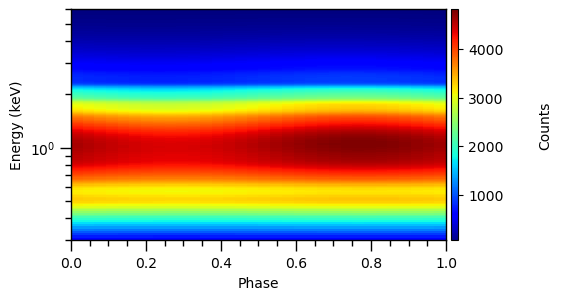

In [3]:
phases_space = np.linspace(0.0, 1.0, 33)
synthetic_data=np.loadtxt('../data/J1808_synthetic_v2_realisation.dat')
fig1,ax1 = plot_one_pulse(synthetic_data, phases_space, NICER.channel_edges, cm=cm.jet)

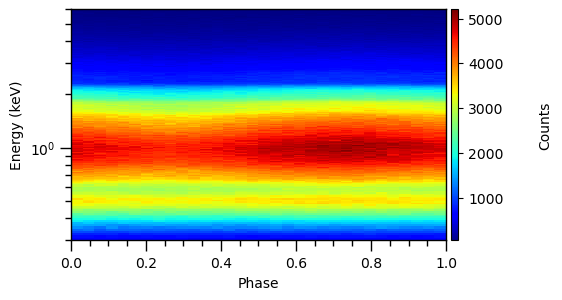

In [4]:
phases_space = np.linspace(0.0, 1.0, 33)
data_2019=np.loadtxt('../data/2019_preprocessed.txt')
fig1,ax1 = plot_one_pulse(data_2019, phases_space, NICER.channel_edges, cm=cm.jet)

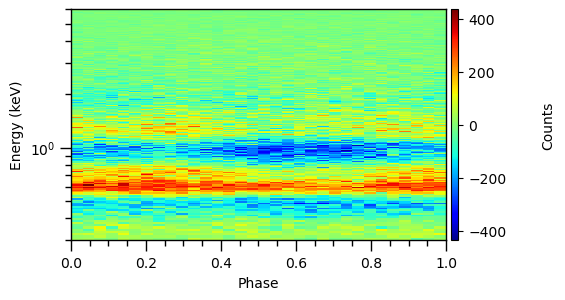

In [5]:
diff = synthetic_data-data_2019
fig1,ax1 = plot_one_pulse(diff, phases_space, NICER.channel_edges, cm=cm.jet)

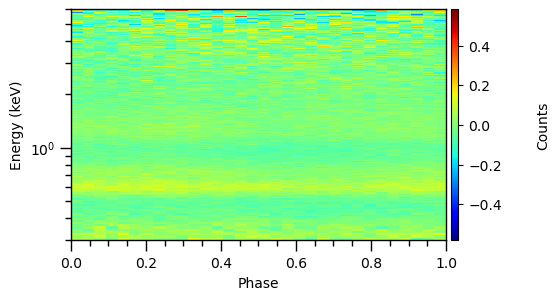

In [6]:
diff = synthetic_data-data_2019
fig1,ax1 = plot_one_pulse(diff/data_2019, phases_space, NICER.channel_edges, cm=cm.jet)